# Julia seems a lot like  Matlab, at first

but look for hints of greater depth
  * richer numerical type system
  * Unicode variables and source text
  * better function-definition syntax
  * metaprogramming: transforming then evaluating chunks of code
  * $f(x) = \int_0^x \xi^2 d\xi$
  
## Solving Ax=b with backslash operator

In [1]:
A = randn(4,4)

4×4 Array{Float64,2}:
 -1.06873   -0.896409   0.0549479  -1.57558  
  0.285859   1.55806    0.589481    0.0152552
  0.176101   0.473059  -0.0262786  -1.7991   
  1.71933    1.41209   -0.883774    0.358512 

In [2]:
A = randn(4,4)
x = rand(4)
b = A*x

4-element Array{Float64,1}:
 -0.443747 
  0.178547 
  0.286539 
 -0.0596171

In [3]:
x̂ = A\b

4-element Array{Float64,1}:
 0.283655
 0.351346
 0.427955
 0.119303

In [4]:
norm(A*x̂ - b)

7.376145397762941e-17

In [5]:
@show norm(A*x̂ - b)

norm(A * x̂ - b) = 7.376145397762941e-17


7.376145397762941e-17

## Calculate singular value decomposition (SVD)

Singular value decomposition is the factorization of matrix $A$ into
$A = U \Sigma V'$ where $U$ and $V$ are orthogonal and $\Sigma$ is diagonal.

In [6]:
U,Σ,V = svd(A);

In [7]:
U

4×4 Array{Float64,2}:
  0.442815   0.34634     0.768003   -0.306813
 -0.576421  -0.0733129   0.589555    0.561061
 -0.137807   0.929846   -0.24503     0.237395
  0.672802  -0.100303   -0.0505631   0.731246

In [8]:
U'*U

4×4 Array{Float64,2}:
 1.0           3.43493e-16   5.00477e-17   1.49324e-17
 3.43493e-16   1.0           2.47009e-17  -5.32585e-17
 5.00477e-17   2.47009e-17   1.0          -1.93038e-17
 1.49324e-17  -5.32585e-17  -1.93038e-17   1.0        

In [9]:
norm(U'*U - I)

1.2104811084762811e-15

In [10]:
norm(U*diagm(Σ)*V' - A)

8.060736722470131e-15

In [11]:
U[:,1]

4-element Array{Float64,1}:
  0.442815
 -0.576421
 -0.137807
  0.672802

In [12]:
U

4×4 Array{Float64,2}:
  0.442815   0.34634     0.768003   -0.306813
 -0.576421  -0.0733129   0.589555    0.561061
 -0.137807   0.929846   -0.24503     0.237395
  0.672802  -0.100303   -0.0505631   0.731246

In [13]:
# demonstrate how to type and show Σ
@show Σ

Σ = [3.29972,2.2915,0.954519,0.48811]


4-element Array{Float64,1}:
 3.29972 
 2.2915  
 0.954519
 0.48811 

In [14]:
err = norm(U*diagm(Σ)*V'-A)

8.060736722470131e-15

In [15]:
typeof(err)

Float64

## Calculate eigenvalues of a symmetric matrix

In [16]:
A = randn(4,4) |> t -> t + t'  # pipe A through map A -> A + A' to symmetrize it
λ = eigmax(A);
@show det(A - λ*I)             # metaprogramming: print expression then evaluate it
;

det(A - λ * I) = -4.704027191002813e-14

In [17]:
typeof(I)

UniformScaling{Int64}

## Integrate Lorenz equations

In [18]:
using ODE
using PyPlot

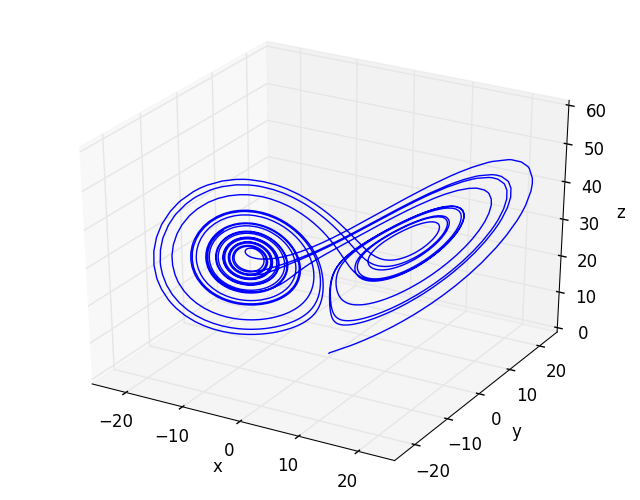

In [19]:
# define Lorenz equations
function f(t, x)
    σ = 10
    β = 8/3
    ρ = 28
    [σ*(x[2]-x[1]); x[1]*(ρ-x[3]); x[1]*x[2] - β*x[3]]
end

# run f once
f(0, [0; 0; 0])

# integrate 
t = 0:0.01:21.0
x₀ = [0.1; 0.0; 0.0]
t,x = ode45(f, x₀, t)

x = hcat(x...)'         # rearrange storage of x (don't ask...)

# plot
plot3D(x[:,1], x[:,2], x[:,3], "b-")
xlabel("x")
ylabel("y")
zlabel("z")
xlim(-25,25)
ylim(-25,25)
zlim(0,60)
;

## Fibonnaci function

In [20]:
f(n) = n < 2 ? 1 : f(n-1) + f(n-2)  # recursive function definition
for i = 0:10
    println("f($i) = $(f(i))")      # string interpolation
end

f(0) = 1
f(1) = 1
f(2) = 2
f(3) = 3
f(4) = 5
f(5) = 8
f(6) = 13
f(7) = 21
f(8) = 34
f(9) = 55
f(10) = 89
